<div align='center'>
    <h1>Bangla Handwritten Digit Classification</h1>
</div>
<br />
<div align='center'>
    <a href='https://sabbir-ahmed16.github.io/portfolio/'>Portfolio</a> | <a href='https://www.linkedin.com/in/sabbir-ahmed-cuet-ete/'>LinkedIn</a> | <a href='https://www.facebook.com/SabbirAhmed823'>Facebook</a>
</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'C:\Users\sabbir\Desktop\ekushCSV\Male\maleDigits.csv')

In [3]:
display(df.head())

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,label
0,0,2,0,1,1,1,1,0,2,3,...,213,96,110,110,34,0,4,1,1,112
1,0,0,0,1,0,0,2,1,0,1,...,88,42,0,0,0,4,1,0,0,112
2,1,0,0,0,0,0,0,2,1,1,...,232,160,50,1,0,5,1,1,2,112
3,2,1,1,0,0,0,1,0,2,1,...,0,6,3,0,0,1,0,0,2,112
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,112


<div class='alert alert-block alert-info' align='center'>
    <b>Labels given in the dataset are not the actual levels. The `metaData.csv` file provides the actual level for each digit.</b>
</div>

In [4]:
# Replacing the values in label column with actual label
df['label'].replace({112: 0, 113: 1, 114: 2, 115: 3, 116: 4, 117: 5, 118: 6, 119: 7, 120: 8, 121: 9}, inplace=True)

In [5]:
df['label'].value_counts()

8    1524
4    1523
9    1523
0    1522
3    1522
1    1521
7    1521
6    1519
2    1517
5    1516
Name: label, dtype: int64

In [6]:
print("Shape of the dataset: ", df.shape)

Shape of the dataset:  (15208, 785)


In [7]:
# Separating the features and labels
features = df.iloc[:, 0:784]
labels = df.iloc[:, -1:]

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score,precision_score,recall_score

In [9]:
# Splitting the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=12)

print("Training size: ", X_train.shape)
print("Test size: ", X_test.shape)

Training size:  (12166, 784)
Test size:  (3042, 784)


In [10]:
class_names = np.unique(labels).tolist()

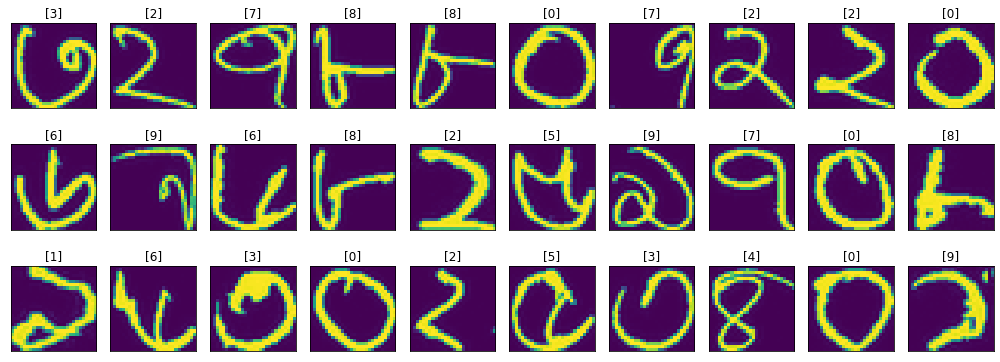

In [11]:
# Plotting some digits
plt.figure(figsize=(14, 12))

for img in range(0, 30):
    plt.subplot(7, 10, img+1)
    grid_data = X_train.iloc[img].values.reshape(28,28)  # reshape from 1d to 2d pixel array
    plt.imshow(grid_data)
    plt.title(f"{y_train.iloc[img].values}")
    plt.xticks([])
    plt.yticks([])
    
plt.tight_layout()

In [12]:
# Normalizing the pixel values
scaler = StandardScaler()

Xn_train = scaler.fit_transform(X_train)
Xn_test = scaler.transform(X_test)

### Training ML Algorithms

In [13]:
# 01. LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression

In [14]:
LR = LogisticRegression(solver='liblinear')

LR.fit(Xn_train, np.squeeze(y_train))
LR_predictions = LR.predict(Xn_test)

In [15]:
# 02. SUPPORT VECTOR MACHINE

from sklearn.svm import SVC

In [16]:
SVM = SVC(kernel='rbf')

SVM.fit(Xn_train, np.squeeze(y_train))
SVM_predictions = SVM.predict(Xn_test)

In [17]:
# 03. DECISION TREE

from sklearn.tree import DecisionTreeClassifier

In [18]:
DT = DecisionTreeClassifier()

DT.fit(Xn_train, np.squeeze(y_train))
DT_predictions = DT.predict(Xn_test)

In [19]:
# 04. RANDOM FOREST

from sklearn.ensemble import RandomForestClassifier

In [20]:
RF = RandomForestClassifier(n_estimators=9)

RF.fit(Xn_train, np.squeeze(y_train))
RF_predictions = RF.predict(Xn_test)

### Model Evaluation

In [21]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [22]:
def model_evaluation(model_name, y_true, y_pred):
    print('=================================================================')
    print(f'\t\tPERFORMANCE OF {model_name}')
    print('=================================================================')
    print(f'Classification Report: \n{classification_report(y_true, y_pred)}')
    print(f'Confusion Matrix: \n{confusion_matrix(y_true, y_pred)}')
    
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f'Accuracy: {accuracy:.2f}')
    return accuracy

In [23]:
LR_acc = model_evaluation('LOGISTIC REGRESSION', y_test, LR_predictions)

		PERFORMANCE OF LOGISTIC REGRESSION
Classification Report: 
              precision    recall  f1-score   support

           0       0.84      0.85      0.85       319
           1       0.76      0.77      0.77       279
           2       0.81      0.84      0.83       306
           3       0.74      0.76      0.75       286
           4       0.80      0.82      0.81       271
           5       0.80      0.76      0.78       302
           6       0.72      0.68      0.70       327
           7       0.85      0.84      0.85       326
           8       0.80      0.86      0.83       331
           9       0.73      0.67      0.70       295

    accuracy                           0.79      3042
   macro avg       0.79      0.79      0.79      3042
weighted avg       0.79      0.79      0.79      3042

Confusion Matrix: 
[[272   5   4   7   5   5   5   4   6   6]
 [  9 216   6   6   4   2   9   5   8  14]
 [  4   8 258   0   8   3   5   7   8   5]
 [  8   3   1 216   5  10  22   

In [24]:
SVM_acc = model_evaluation('SUPPORT VECTOR MACHINE', y_test, SVM_predictions)

		PERFORMANCE OF SUPPORT VECTOR MACHINE
Classification Report: 
              precision    recall  f1-score   support

           0       0.94      0.91      0.93       319
           1       0.92      0.86      0.89       279
           2       0.89      0.93      0.91       306
           3       0.91      0.85      0.88       286
           4       0.91      0.89      0.90       271
           5       0.91      0.88      0.89       302
           6       0.88      0.87      0.88       327
           7       0.82      0.92      0.87       326
           8       0.92      0.93      0.93       331
           9       0.84      0.87      0.86       295

    accuracy                           0.89      3042
   macro avg       0.89      0.89      0.89      3042
weighted avg       0.89      0.89      0.89      3042

Confusion Matrix: 
[[291   2   1   5   3   2   1   6   3   5]
 [  3 241   8   0   3   1   3   6   3  11]
 [  1   1 284   0   5   1   0   8   1   5]
 [  4   1   1 244   0   7  11

In [25]:
DT_acc = model_evaluation('DECISION TREE CLASSIFIER', y_test, DT_predictions)

		PERFORMANCE OF DECISION TREE CLASSIFIER
Classification Report: 
              precision    recall  f1-score   support

           0       0.79      0.80      0.80       319
           1       0.69      0.72      0.71       279
           2       0.82      0.83      0.83       306
           3       0.72      0.78      0.75       286
           4       0.74      0.76      0.75       271
           5       0.72      0.71      0.71       302
           6       0.74      0.68      0.71       327
           7       0.85      0.82      0.83       326
           8       0.81      0.80      0.81       331
           9       0.61      0.60      0.61       295

    accuracy                           0.75      3042
   macro avg       0.75      0.75      0.75      3042
weighted avg       0.75      0.75      0.75      3042

Confusion Matrix: 
[[256   6   1  11   4  13   8   5   4  11]
 [ 11 201   5   5   9   9   5   5   3  26]
 [  2   5 255   2  11   3   4  10   6   8]
 [  8   2   1 222   2   5  

In [26]:
RF_acc = model_evaluation('RANDOM FOREST CLASSIFIER', y_test, RF_predictions)

		PERFORMANCE OF RANDOM FOREST CLASSIFIER
Classification Report: 
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       319
           1       0.75      0.83      0.79       279
           2       0.86      0.93      0.89       306
           3       0.81      0.81      0.81       286
           4       0.81      0.84      0.83       271
           5       0.89      0.81      0.85       302
           6       0.84      0.77      0.81       327
           7       0.91      0.90      0.91       326
           8       0.91      0.88      0.89       331
           9       0.79      0.71      0.74       295

    accuracy                           0.84      3042
   macro avg       0.84      0.84      0.84      3042
weighted avg       0.84      0.84      0.84      3042

Confusion Matrix: 
[[289   8   0   3   4   2   2   2   2   7]
 [  6 231   3   2   6   1   3   4   5  18]
 [  1   4 284   2   4   1   2   4   2   2]
 [ 12   5   5 233   3   6  

### Plotting the Predictions Given by SVM

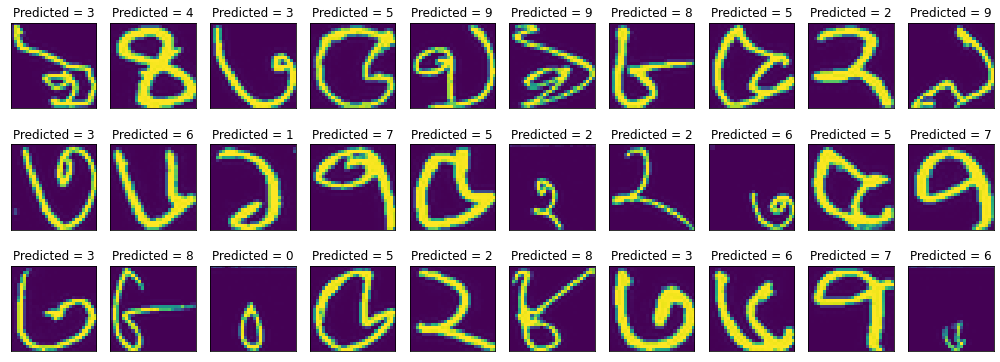

In [27]:
# Plotting some digits
plt.figure(figsize=(14, 12))

for img in range(0, 30):
    plt.subplot(7, 10, img+1)
    grid_data = X_test.iloc[img].values.reshape(28,28)  # reshape from 1d to 2d pixel array
    plt.imshow(grid_data)
    plt.title(f"Predicted = {SVM_predictions[img]}")
    plt.xticks([])
    plt.yticks([])
    
plt.tight_layout()

In [28]:
# Plotting the misclassified samples given by SVM
y_test['predicted'] = SVM_predictions

In [29]:
# Taking the indices and converting into a list
indices = y_test.index.tolist()

misclass_indices = list()

for i in indices:
    if y_test['label'][i] != y_test['predicted'][i]:
        misclass_indices.append(i)

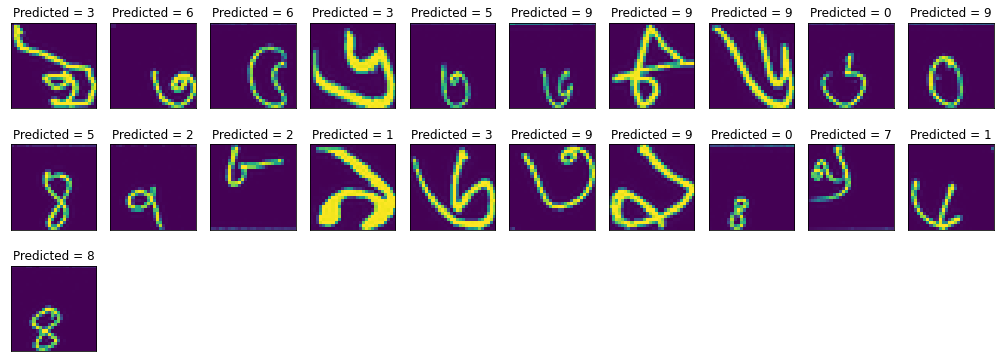

In [30]:
# Plotting some misclassified digits
plt.figure(figsize=(14,12))

for i,img in enumerate(misclass_indices[0:21]):
    plt.subplot(7, 10, i+1)
    grid_data = X_test.loc[img].values.reshape(28,28)  # reshape from 1d to 2d pixel array
    plt.imshow(grid_data)
    plt.title(f"Predicted = {y_test['predicted'].loc[img]}")
    plt.xticks([])
    plt.yticks([])
    
plt.tight_layout()

### Performance Evaluation

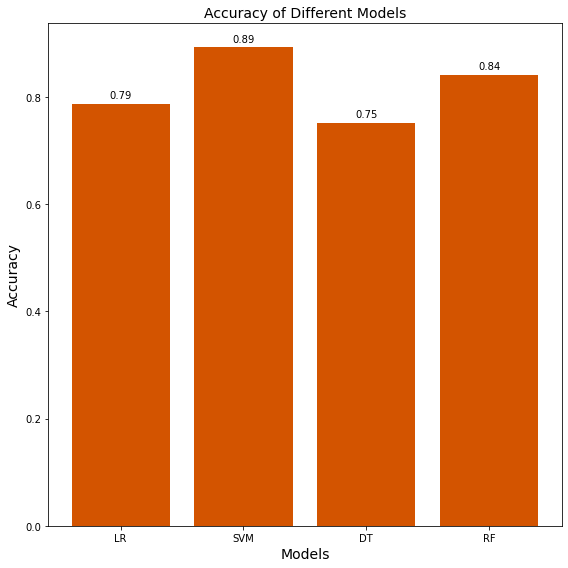

In [31]:
# Accuracy Bar Chart
models = ['LR', 'SVM', 'DT', 'RF']
accuracies = [LR_acc, SVM_acc, DT_acc, RF_acc]

fig = plt.figure(figsize=(8, 8))
plt.bar(models, accuracies, color='#D35400')

for i in range(len(models)):
    plt.text(i, accuracies[i]+0.01, '{:.2f}'.format(accuracies[i]), ha = 'center')

plt.xlabel("Models", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.title("Accuracy of Different Models", fontsize=14)
fig.tight_layout()
plt.show()